## Heat Transfer Conduction Calculations
This jupyter notebook walks through basic heat transfer calculations.

There are three basic types of heat transfer:
1. __Conduction__
1. Convection
1. Radiation

This tutorial covers __conduction calculations__
We will be using will use numpy and matplotlib, which are imported below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Conduction
Conduction is defined as the transfer of heat through matter without motion. Before getting into a detailed derivation of the heat equation, lets take a parochial look at heat transfer analysis. 

### Thermal Resistance Circuits
An analogy between conduction heat transfer and electric circuits can be exploited to aid in problem solving. $\dot{Q}$, the rate of heat transfer, is analogous to current, and $R$, thermal resistance, is analogous to electric resistance. Thus we can define $\dot{Q}$.
$$\dot{Q} = \frac{T_1 - T_2}{R}$$.

<!-- resistive model of heat transfer through a composite slab -->
<img src="assets/HeatTransferConduction_CompositeSlab.PNG">

Lets run through an example using this resistive model. 

__Example: 2D Brick Wall__
A brick wall with thermal insulation on both sides has temperatures $T_1, T_2, T_3, T_4$ which are defined in the image below. Thus, we have __four nodes__ in our resistive model, and __three thermal resistances__.

<!-- Example 1: Heat Transfer through brick wall using resistive model -->
<img src="assets/HeatTransferConduction_Example1.PNG">

$k$ is the thermal conductivity.

$$ k_{brick} = k_2 = 0.7 W/m-K $$
$$ k_{insulation} = k_1 = k_3 = 0.07 W/m-K $$
$$ A_1 = A_2 = A_3 = A $$
$$ L1 = L3 = 0.03 $$ 
$$ L2 = 0.1 $$

The overall resistance is:
$$ R = R_1 + R_2 + R_3 = \frac{L_1}{k_1 A_1} + \frac{L_2}{k_2 A_2} + \frac{L_3}{k_3 A_3} $$

Solving with an arbitrary Area, $A$, we get
$$ A_1 R_1 = \frac{L_1}{k_1},  A_2 R_2 = \frac{L_2}{k_2}, A_3 R_3 = \frac{L_3}{k_3} $$

Lets define calculate values of $AR$

In [2]:
# Temperatures at stations
T1 = 150
T4 = 10  # celcius
# define values for thermal conductivity
k = [0.07, 0.7, 0.07]
# Length of layers
L = [0.03, 0.1, 0.03]

AR = []  # initialize empty array
for i in range(0,len(k)):
    AR.append(L[i]/k[i])

print(AR, "m^2 K/W")

[0.4285714285714285, 0.14285714285714288, 0.4285714285714285] m^2 K/W


These values can be used to calculate $\dot{Q}$ the rate of heat transfer. This can be related to a more physically relevant value, $\dot{q}$, the heat flux. Where,
$$ \dot{q} = \frac{\dot{q}}{A} = \frac{T_1 - T_4}{RA} $$
$$ RA = \sum_{n}{AR_n} $$

In [3]:
q = float(T1 - T4)/np.sum(AR)
print('q = ', q, 'W/m^2')  # W/m^2

q =  140.0 W/m^2


The temperature in the intermediary steps can be found using the fact that $\dot{Q}$ is constant throughout the slab.

$$ \dot{q} = \frac{T_1 - T_2}{R_1 A} $$

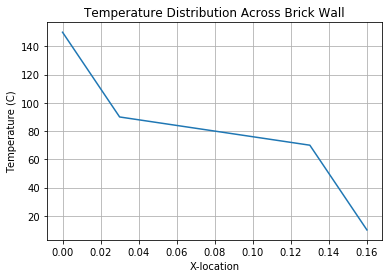

T1 =  150 C
T2 =  90.0 C
T3 =  70.0 C
T4 =  10 C


In [5]:
T2 = -q*AR[0] + T1
T3 = q*AR[2] + T4

T = [T1, T2, T3, T4]  # vectorize temps
x = [0, L[0], L[0]+L[1], L[0]+L[1]+L[2]]

# Plot Temperature distribution
plt.title('Temperature Distribution Across Brick Wall')
plt.xlabel('X-location')
plt.ylabel('Temperature (C)')
plt.grid()
plt.plot(x,T)
plt.show()

# Print Temperatures
print('T1 = ', T1, 'C')
print('T2 = ', T2, 'C')
print('T3 = ', T3, 'C')
print('T4 = ', T4, 'C')

### Derivation of the Heat Equation for Conduction

Consider a one-dimensional rod. We want to determine the temperature at any point, x, at any time, t; T(x,t). Lets start by defining a physical model.

<!-- image of 1D rod -->
<img src="assets/HeatTransferConduction_1Drod.gif">

We define energy density as the energy per unit volume, and heat flux, $\Phi$, as the energy per unit time per unit area.

$$\Phi = \frac{energy}{(area)(time)}$$

So looking back at our rod, the heat flux in and out of the rod is one methof of changing the energy density of our rod at a given time. Steady-state is therefore defined as..
$$ \Sigma \Phi = 0 $$

$\Theta$, the heat generated/dissipated per unit time, is another physical phenomenon through which the energy density in an object can change.

## References

1. _Introduction to Engineering Heat Transfer_ https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-050-thermal-energy-fall-2002/lecture-notes/10_part3.pdf